In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# keras.functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD  #notice! use tensorflow.keras.optimizers

# keras.dataset
from keras.datasets import mnist  # 手寫辨識資料  mnist

# keras.utilis function
from keras.utils import np_utils    # one-Hot encoding 0 ~ 9 改成向量的 utils

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)  # 矩陣拉平
x_test = x_test.reshape(10000, 784)

In [6]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [7]:
y_train_10 = np_utils.to_categorical(y_train, 10) # one-hot encoding
y_test_10 = np_utils.to_categorical(y_test, 10)

model functional API 只在意輸入與輸出  
當出現:
- 多重輸出輸入模型
- 分歧
- 合併
- 具循環, 重複模型

In [8]:
from keras.models import Model

In [9]:
from keras.layers import Input

In [10]:
f_1 = Dense(500, activation = 'sigmoid')
f_2 = Dense(500, activation = 'sigmoid')
f_3 = Dense(10, activation = 'softmax')

In [11]:
print(f_1)

In [12]:
x = Input(shape = (784,))

In [13]:
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [14]:
h_1 = f_1(x)
h_2 = f_2(h_1)
y = f_3(h_2)

In [15]:
print(h_1)
print(h_2)
print(y)

KerasTensor(type_spec=TensorSpec(shape=(None, 500), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 500), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")


In [16]:
model = Model(x, y) # 把模型包裝
model.summary()    # Activation 在 Dense 裡面

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'mse', optimizer = SGD(learning_rate= 0.1), metrics = ['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size = 100, epochs = 5)

Epoch 1/5
600/600 [==============================] - 9s 13ms/step - loss: 27.3048 - accuracy: 0.0918
Epoch 2/5
600/600 [==============================] - 6s 11ms/step - loss: 27.3046 - accuracy: 0.0905
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 27.3046 - accuracy: 0.0923
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 27.3046 - accuracy: 0.0944
Epoch 5/5
600/600 [==============================] - 7s 12ms/step - loss: 27.3046 - accuracy: 0.0964


In [19]:
model.load_weights('手寫辨識.h5')

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 27.3213 - accuracy: 0.9312


[27.321250915527344, 0.9312000274658203]

###### summary
---------------
model functional API 操作流程  
1. 將層定義成明確的函數
2. 透過層函數將變數連接
3. 定義神經網路的輸入與輸出

In [21]:
from keras.layers import concatenate, add  # 合併結構

In [22]:
f_4 = Dense(500, activation = ('relu'))
z = f_4(h_1)

# new f_3
f_3 = Dense(10, activation = ('softmax'))

In [23]:
u = concatenate([h_2, z])  # 多個獨立分歧的層給包起來
y = f_3(u)

In [24]:
print(u)
print(y)

KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_4/Softmax:0', description="created by layer 'dense_4'")


In [25]:
model = Model(x, y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0           []                               
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      ['input_1[0][0]']                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          250500      ['dense[0][0]']                  
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 500)          250500      ['dense[0][0]']                  
____________________________________________________________________________________________

### 自定義的不具可訓練權重之神經網路層

In [26]:
from keras.layers.core import Lambda
from keras import backend as K

In [27]:
def average_function(inputs):   # 對輸入取平均
    return K.mean(inputs, axis = 1)

In [28]:
average_layer = Lambda(average_function)

In [29]:
print(average_layer)

In [30]:
inputSize = 4  # 輸入四維向量
x = Input(shape = (inputSize, ))
y = average_layer(x)
average_model = Model(x, y)

In [31]:
average_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
lambda (Lambda)              (None,)                   0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [32]:
average_model.compile(loss = 'mse', optimizer = 'sgd')

In [33]:
np.array([[1, 2, 3, 4]]).shape  # 不是表示四維的向量而是表示一筆四維的向量(1, 4)

(1, 4)

In [34]:
average_model.predict(np.array([[1, 2, 3, 4]]))

array([2.5], dtype=float32)

In [35]:
average_model.predict(np.array([[1, 2, 3, 4], [1, 1, 1, 1]]))

array([2.5, 1. ], dtype=float32)

具有抽樣功能的神經網路層

In [36]:
sampling_dim = 2

def sampling(args):  # 此為抽樣函數: 使用常態分配之線性特性
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape = (sampling_dim, ), mean = 0., stddev = 1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [37]:
sample_layer = Lambda(sampling, output_shape = (sampling_dim, ))

In [38]:
# 多重輸入模型
m = Input(shape = (sampling_dim, ))
s = Input(shape = (sampling_dim, ))
z = sample_layer([m, s])   # Lambda 可以使用 list 包裝

sample_model = Model([m, s], z)
sample_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0           []                               
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2)]          0           []                               
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 2)            0           ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [39]:
test_mean = np.random.randint(10, size = sampling_dim).reshape(1, 2)
test_log_var = np.array([[0, 0]])

print('平均為(%d, %d)'%(test_mean[0][0], test_mean[0][1]))

平均為(5, 0)


In [40]:
sample_model.predict([test_mean, test_log_var])

array([[4.9340277 , 0.15394434]], dtype=float32)

和 numpy 上的抽樣函數做比較

In [41]:
num_of_samples = 100

In [42]:
np_sample = np.random.multivariate_normal(test_mean[0], np.identity(2), size = num_of_samples)

In [43]:
keras_sample = np.zeros((num_of_samples, 2))
for i in range(num_of_samples):
    keras_sample[i] = sample_model.predict([test_mean, test_log_var])

Text(0.5, 1.0, 'Normal Random Samples using Keras/ Numpy')

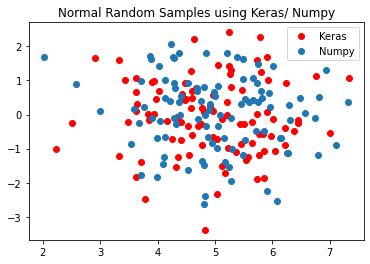

In [45]:
plt.plot(keras_sample[:, 0], keras_sample[:, 1], 'ro')
plt.plot(np_sample[:, 0], np_sample[:, 1], 'o')
plt.legend(['Keras', 'Numpy'])
plt.title('Normal Random Samples using Keras/ Numpy')